<a href="https://colab.research.google.com/github/akshit2801/Mid-term-DLNLP/blob/main/MID_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')



Mounted at /gdrive


In [ ]:
# 2.1 Read Driving data such as acc,turns

path ="/gdrive/MyDrive/Colab_data_files/deeplearning/"



In [ ]:
# 2.2
data = pd.read_csv("/gdrive/MyDrive/Colab_data_files/deeplearning/test_motion_data.csv")
#pd.read_csv(path + "test_motion_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2.2.1
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [ ]:
# 2.2.2
data.shape   # (10000, 14)

(3084, 8)

In [ ]:
data['Class'].unique()

array(['AGGRESSIVE', 'NORMAL', 'SLOW'], dtype=object)

In [ ]:
data['Class'] = data['Class'].map({'AGGRESSIVE' : 0, 'NORMAL' : 1, 'SLOW' : 2})

In [ ]:
# 2.3 Pop out target
y = data.pop('Class')

In [ ]:
# 2.3.1
data.shape

(3084, 7)

In [ ]:
# 3.0 Check NULL
data.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Timestamp    0
dtype: int64

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

(2313, 7)

(771, 7)

In [ ]:
y.shape

(3084,)

In [ ]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

In [ ]:
# 6.0
#model = tf.keras.Sequential()

In [ ]:
#model.add(tf.keras.layers.Input(shape=(7,)))

In [ ]:
#model.add(tf.keras.layers.Dense(150, activation = 'tanh'))

In [ ]:
#model.add(tf.keras.layers.Dense(200, activation = 'tanh'))

In [ ]:
#model.add(tf.keras.layers.Dense(100, activation = 'tanh'))

In [ ]:
#model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
#model.summary()



In [ ]:
 #model.add(tf.keras.layers.Input(shape=(7,)))
  #  model.add(tf.keras.layers.Dense(150, activation='relu'))
   # model.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
    #model.add(tf.keras.layers.Dense(200, activation='relu'))
  #  model.add(tf.keras.layers.Dropout(0.3))
   # model.add(tf.keras.layers.Dense(100, activation='relu'))
    #model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


#model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

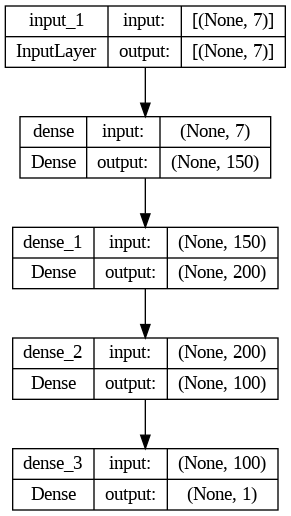

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [ ]:
# 7.0
history = model.fit(X_train,y_train,
                    epochs = 500,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/500
73/73 [==============================] - 4s 20ms/step - loss: -4.2424 - acc: 0.4211 - val_loss: -7.9291 - val_acc: 0.5733
Epoch 2/500
73/73 [==============================] - 1s 8ms/step - loss: -10.2919 - acc: 0.5806 - val_loss: -11.5323 - val_acc: 0.6005
Epoch 3/500
73/73 [==============================] - 1s 8ms/step - loss: -13.8095 - acc: 0.5798 - val_loss: -14.6929 - val_acc: 0.5966
Epoch 4/500
73/73 [==============================] - 0s 5ms/step - loss: -16.9780 - acc: 0.5642 - val_loss: -17.7899 - val_acc: 0.6005
Epoch 5/500
73/73 [==============================] - 0s 5ms/step - loss: -20.3126 - acc: 0.5802 - val_loss: -20.8084 - val_acc: 0.5992
Epoch 6/500
73/73 [==============================] - 0s 5ms/step - loss: -23.4199 - acc: 0.5746 - val_loss: -23.7198 - val_acc: 0.5850
Epoch 7/500
73/73 [==============================] - 0s 5ms/step - loss: -26.6116 - acc: 0.5802 - val_loss: -26.7827 - val_acc: 0.6018
Epoch 8/500
73/73 [==============================] - 0s 

In [ ]:
# 7.1
model.evaluate(X_test,y_test)

25/25 [==============================] - 0s 2ms/step - loss: -1438.5751 - acc: 0.6005


[-1438.5750732421875, 0.6005188226699829]